In [46]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\moatz\Desktop\Customer Churn.csv")

In [47]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [49]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [50]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV

In [51]:
from sklearn.model_selection import train_test_split
inputs=df.drop(columns=['Churn'])
target=df['Churn']

In [52]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

inputs_scaled=scaler.fit_transform(inputs)


In [53]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [54]:
print(f"Original training data: {x_train.shape}")
print(f"Resampled training data: {X_train_res.shape}")

Original training data: (2520, 15)
Resampled training data: (4218, 15)


In [45]:
pd.Series(y_train).value_counts().reset_index()

,Churn,count
0,0,2109
1,1,411


In [55]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

Accuracy: 0.8492063492063492

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91       546
           1       0.47      0.90      0.62        84

    accuracy                           0.85       630
   macro avg       0.72      0.87      0.76       630
weighted avg       0.91      0.85      0.87       630



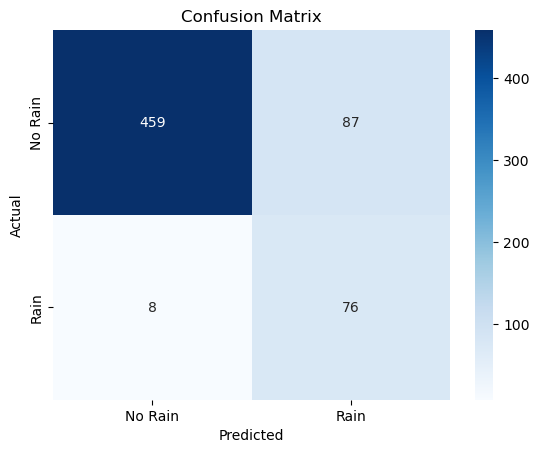

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

# 3. Predict class labels and probabilities
y_pred = logreg.predict(x_test)
y_proba = logreg.predict_proba(x_test)[:, 1]

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [57]:


logreg = LogisticRegression(max_iter=1000)

# Set up the parameter grid
param_grid = {
    'penalty': ['l2', 'none'],  # Regularization term (L2 regularization or none)
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solver for optimization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train_res, y_train_res)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Make predictions using the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
print("Test accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))



Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.87
Test accuracy: 0.84


C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\moatz\anaconda3\Lib\site-packages

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
model = Sequential()
model.add(Dense(123, input_shape=(X_train_res.shape[1],), activation="relu",kernel_regularizer=regularizers.l2(0.01)))
BatchNormalization(),
model.add(Dense(56, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))  
model.add(Dense(8, activation="relu"))   
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation="sigmoid"))                               # Output layer for binary classification

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train_res, y_train_res, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

C:\Users\moatz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\moatz\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7986 - loss: 1.0912 - val_accuracy: 0.8945 - val_loss: 0.5389
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.4006 - val_accuracy: 0.9360 - val_loss: 0.4374
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3386 - val_accuracy: 0.9419 - val_loss: 0.3165
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8679 - loss: 0.3186 - val_accuracy: 0.9443 - val_loss: 0.2873
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8817 - loss: 0.2871 - val_accuracy: 0.9668 - val_loss: 0.2555
Epoch 6/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8794 - loss: 0.2796 - val_accuracy: 0.9123 - val_loss: 0.3947
Epoch 7/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8937 - loss: 0.2757 - val_accuracy: 0.9645 - val_loss: 0.2828
Epoch 8/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9108 - loss: 0.2508 - val_accu

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, BatchNormalization, Activation


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
model = Sequential()
model.add(Dense(123, input_shape=(X_train_res.shape[1],), activation="relu"))
BatchNormalization(),
model.add(Dense(56, activation="relu"))
model.add(Dense(16, activation="relu"))  
model.add(Dense(8, activation="relu"))   
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation="sigmoid"))                               # Output layer for binary classification

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train_res, y_train_res, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7817 - loss: 0.4366 - val_accuracy: 0.8922 - val_loss: 0.3445
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8831 - loss: 0.2410 - val_accuracy: 0.9372 - val_loss: 0.2445
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9142 - loss: 0.1938 - val_accuracy: 0.9585 - val_loss: 0.2111
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9270 - loss: 0.1725 - val_accuracy: 0.9787 - val_loss: 0.1622
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9472 - loss: 0.1396 - val_accuracy: 0.9597 - val_loss: 0.1666
Epoch 6/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9445 - loss: 0.1345 - val_accuracy: 0.9716 - val_loss: 0.1307
Epoch 7/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9580 - loss: 0.1175 - val_accuracy: 0.9882 - val_loss: 0.0826
Epoch 8/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9560 - loss: 0.1099 - val_accu

In [59]:
y_pred = (model.predict(x_test) > 0.5).astype(int)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[530  16]
 [  5  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       546
           1       0.83      0.94      0.88        84

    accuracy                           0.97       630
   macro avg       0.91      0.96      0.93       630
weighted avg       0.97      0.97      0.97       630



In [60]:
y_predss = (model.predict(X_train_res) > 0.5).astype(int)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_train_res, y_predss))

print("\nClassification Report:")
print(classification_report(y_train_res, y_predss))

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[2047   62]
 [  67 2042]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2109
           1       0.97      0.97      0.97      2109

    accuracy                           0.97      4218
   macro avg       0.97      0.97      0.97      4218
weighted avg       0.97      0.97      0.97      4218



In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, BatchNormalization, Activation


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
model = Sequential()
model.add(Dense(123, input_shape=(x_train.shape[1],), activation="relu"))
BatchNormalization(),
model.add(Dense(56, activation="relu"))
model.add(Dense(16, activation="relu"))  
model.add(Dense(8, activation="relu"))   
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation="sigmoid"))                               # Output layer for binary classification

# Compile the model
model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Epoch 1/100


C:\Users\moatz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\moatz\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8739 - loss: 0.3105 - val_accuracy: 0.9067 - val_loss: 0.2252
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9054 - loss: 0.2176 - val_accuracy: 0.9167 - val_loss: 0.1940
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9114 - loss: 0.2020 - val_accuracy: 0.9286 - val_loss: 0.1775
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9201 - loss: 0.1921 - val_accuracy: 0.9226 - val_loss: 0.1818
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9256 - loss: 0.1720 - val_accuracy: 0.9266 - val_loss: 0.1814
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9306 - loss: 0.1563 - val_accuracy: 0.9206 - val_loss: 0.1653
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9160 - loss: 0.1637 - val_accuracy: 0.9206 - val_loss: 0.1968
Epoch 8/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9389 - loss: 0.1356 - val_accuracy: 0.9306

In [76]:
y_train_pred = (model.predict(X_train_res) > 0.5).astype(int)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [58]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [77]:
y_train_pred = (model.predict(X_train_res) > 0.5).astype(int)

# TRAINING SET EVALUATION
print("TRAINING SET EVALUATION")
print(confusion_matrix(y_train_res, y_train_pred))  # Pass the true labels as the first argument
print(classification_report(y_train_res, y_train_pred))  # Compare true vs predicted labels


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
TRAINING SET EVALUATION
[[2056   53]
 [  34 2075]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2109
           1       0.98      0.98      0.98      2109

    accuracy                           0.98      4218
   macro avg       0.98      0.98      0.98      4218
weighted avg       0.98      0.98      0.98      4218

